In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 1.3 MB/s 
     |████████████████████████████████| 11.3 MB 46.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=8e48153f0e9a2312068d1acfe9910a7f4376d57f3011620efe71ab11646df68c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import spacy
import gensim

from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer
#import pyLDAvis
#import pyLDAvis.gensim_models

nlp = spacy.load('en')


In [ ]:
dataset2020_csv_path= '/content/drive/MyDrive/ADA_Proj/quotes-2017-clean.csv'
df_reader = pd.io.json.read_json(dataset2020_csv_path, lines=True, compression='bz2',chunksize=100000)

In [ ]:
def get_americans(df):
 return df[df['nationality'].apply(lambda x: False if x is None else 'Q30' in x )]

In [ ]:
import re
def punctuation(df):
  # Remove punctuation
  df['quotation_processed'] =   df['quotation'].map(lambda x: re.sub('[\[\],\.!?]', '', x))
  # Convert to lowercase
  df['quotation_processed'] =   df['quotation_processed'].map(lambda x: x.lower())
  return df

In [ ]:
import nltk
lemmatizer = WordNetLemmatizer()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[lemmatizer.lemmatize(word) for word in simple_preprocess(str(doc)) 
             if word not in spacy_stopwords] for doc in texts]



In [ ]:
import nltk
nltk.download('wordnet')
def get_data_words(df):
  data = df.quotation_processed.values.tolist()
  data_words = list(sent_to_words(data))
  # remove stop words
  data_words = remove_stopwords(data_words)
  return data_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary()
mydf=[]
for data in df_reader:

  df = get_americans(data)
  df = punctuation(df)
  mydf.append(df)
  data_words = get_data_words(df)
  dictionary.add_documents(data_words)
my_df= pd.concat(mydf, ignore_index=True)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
#corpus = [dictionary.doc2bow(doc) for doc in data_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_reader = pd.io.json.read_json(dataset2020_csv_path, lines=True, compression='bz2',chunksize=100000)
corpus=[]
for df in df_reader:
  df = get_americans(df)
  df = punctuation(df)
  data_words = get_data_words(df)
  corpus = corpus + [dictionary.doc2bow(doc) for doc in data_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from gensim.models import LdaMulticore
lda_model = LdaMulticore.load('/content/drive/MyDrive/ADA_Proj/lda_2017.model')

Whole model visualisation

In [ ]:
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [19]:
lda_model.show_topics(num_topics=20)

[(0,
  '0.021*"president" + 0.020*"news" + 0.018*"left" + 0.016*"story" + 0.014*"medium" + 0.013*"moment" + 0.010*"sign" + 0.009*"happened" + 0.009*"obama" + 0.009*"read"'),
 (1,
  '0.019*"community" + 0.017*"help" + 0.017*"state" + 0.016*"need" + 0.016*"program" + 0.012*"student" + 0.012*"public" + 0.011*"service" + 0.011*"support" + 0.010*"education"'),
 (2,
  '0.046*"day" + 0.042*"time" + 0.034*"long" + 0.019*"team" + 0.018*"term" + 0.015*"guy" + 0.015*"man" + 0.014*"game" + 0.013*"like" + 0.012*"play"'),
 (3,
  '0.076*"think" + 0.049*"thing" + 0.047*"good" + 0.036*"lot" + 0.033*"ll" + 0.024*"like" + 0.022*"going" + 0.018*"way" + 0.017*"better" + 0.017*"little"'),
 (4,
  '0.077*"new" + 0.022*"business" + 0.017*"company" + 0.015*"market" + 0.014*"industry" + 0.013*"york" + 0.012*"property" + 0.011*"technology" + 0.010*"private" + 0.010*"consumer"'),
 (5,
  '0.146*"ve" + 0.069*"got" + 0.035*"house" + 0.030*"white" + 0.028*"seen" + 0.025*"far" + 0.017*"heard" + 0.014*"free" + 0.014*"gr

In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/lda_vis_2017.html")

Cluster 6 : tax reforms \\
Cluster 7 : health system \\
Cluster 8 : war, military ,security \\
Cluster 15: Elections \\
Cluster 17 : Russia  
Let's try to visualise some of the quotes


In [12]:
to_pro = []
unseen_doc = corpus
vector = lda_model[unseen_doc]
for  t in vector:
  to_pro.append(t)

In [13]:
y=np.array([np.array(xi) for xi in to_pro])
y.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(1724103,)

In [14]:
cluster_by_quote=[]
for arr in y :
  best_cluster_ind= np.argmax(arr[:,1])
  cluster_by_quote.append(arr[best_cluster_ind])

cluster_by_quote=np.array(cluster_by_quote)
intr =pd.DataFrame(data=cluster_by_quote[:,0], columns=["Cluster_num"])

my_df['Cluster_num']=intr

In [15]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 8.4 MB/s 


In [16]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
my_df['compound']=my_df['quotation'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [17]:
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','would','think','know','want'])
def wordclouds(df):
  text=df['quotation_processed'].str.cat(sep=' ')
  text=' '.join([word for word in text.split()])
  wordcloud = WordCloud(background_color = 'white', stopwords = stop_words , max_words = 70).generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show();
  return wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let's seperate the republicans and democrats

In [18]:
republican_df =my_df[my_df['party'].apply(lambda x: False if( x is None)or len(x)==0  else 'Q29468'  in x[-1] )]
democrat_df =my_df[my_df['party'].apply(lambda x: False if (x is None ) or len(x)==0  else 'Q29552'  in x[-1])]

Let's study the sentiment of each party regarding the health policy

In [20]:
democrat_sentiment_Onhealth =democrat_df[democrat_df['Cluster_num']== 13]['compound']
republican_sentiment_Onhealth =republican_df[republican_df['Cluster_num']== 13]['compound']

In [21]:
print('Mean of the sentiment of democrats regarding Health policy',democrat_sentiment_Onhealth.mean())
print('Mean of the sentiment of republicans regarding Health policy',republican_sentiment_Onhealth.mean())

Mean of the sentiment of democrats regarding Health policy 0.12329628851101186
Mean of the sentiment of republicans regarding Health policy 0.1579862994157183


In [22]:
print('Variance of the sentiment of democrats regarding Health policy',democrat_sentiment_Onhealth.var())
print('Variance of the sentiment of republicans regarding Health policy',republican_sentiment_Onhealth.var())

Variance of the sentiment of democrats regarding Health policy 0.22683505610610724
Variance of the sentiment of republicans regarding Health policy 0.1991227742652912


In [23]:
from scipy.stats import ttest_ind

Text(0.5, 0, 'Sentiment')

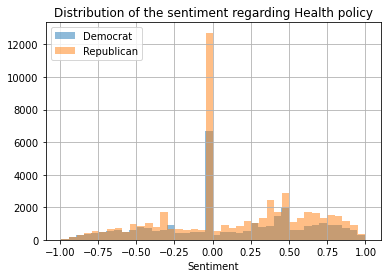

In [24]:
democrat_sentiment_Onhealth.hist(bins=40, alpha=0.5)
ax = republican_sentiment_Onhealth.hist(bins=40, alpha=0.5)
ax.legend(labels=['Democrat','Republican'],loc='upper left')
ax.set_title('Distribution of the sentiment regarding Health policy')
plt.xlabel('Sentiment')

In [25]:
ttest = ttest_ind(democrat_sentiment_Onhealth,republican_sentiment_Onhealth)
print(ttest)
print('The difference in the sentiment regarding Health policy is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-10.615025224202592, pvalue=2.6378038842019757e-26)
The difference in the sentiment regarding Health policy is significant:  True


Let's now take a look at tax reforms

In [26]:
democrat_sentiment_Ontax =democrat_df[democrat_df['Cluster_num']== 14]['compound']
republican_sentiment_Ontax =republican_df[republican_df['Cluster_num']== 14]['compound']

In [27]:
print('Mean of the sentiment of democrats regarding tax policy',democrat_sentiment_Ontax.mean())
print('Mean of the sentiment of republicans regarding tax policy',republican_sentiment_Ontax.mean())

Mean of the sentiment of democrats regarding tax policy 0.08584346038040791
Mean of the sentiment of republicans regarding tax policy 0.10438136016612087


In [28]:
print('Variance of the sentiment of democrats regarding Tax policy',democrat_sentiment_Ontax.var())
print('Variance of the sentiment of republicans regarding tax policy',republican_sentiment_Ontax.var())

Variance of the sentiment of democrats regarding Tax policy 0.20003841760191973
Variance of the sentiment of republicans regarding tax policy 0.18983519590882073


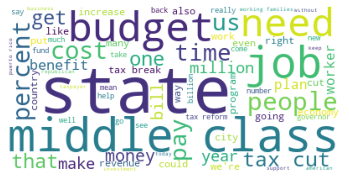

In [41]:
wordclouds(democrat_df[democrat_df['Cluster_num']== 14]).to_file('/content/drive/MyDrive/ADA_Proj/wordcloud_democrat_tax_2017.png')

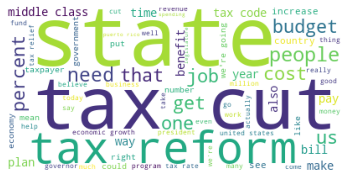

In [42]:
wordclouds(republican_df[republican_df['Cluster_num']== 14]).to_file('/content/drive/MyDrive/ADA_Proj/wordcloud_republican_tax_2017.png')

Text(0.5, 0, 'Sentiment')

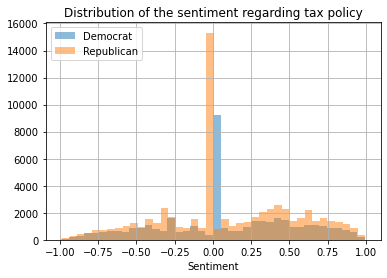

In [29]:
democrat_sentiment_Ontax.hist(bins=40, alpha=0.5)
ax = republican_sentiment_Ontax.hist(bins=40, alpha=0.5)
ax.legend(labels=['Democrat','Republican'],loc='upper left')
ax.set_title('Distribution of the sentiment regarding tax policy')
plt.xlabel('Sentiment')

In [30]:
ttest = ttest_ind(democrat_sentiment_Ontax,republican_sentiment_Ontax)
print(ttest)
print('The difference in the sentiment regarding tax policy is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-6.650380862215975, pvalue=2.937624645235532e-11)
The difference in the sentiment regarding tax policy is significant:  True


Sentiment about War

In [31]:
democrat_sentiment_war =democrat_df[democrat_df['Cluster_num']== 15]['compound']
republican_sentiment_war =republican_df[republican_df['Cluster_num']== 15]['compound']

In [32]:
print('Mean of the sentiment of democrats regarding War',democrat_sentiment_war.mean())
print('Mean of the sentiment of republicans regarding War',republican_sentiment_war.mean())

Mean of the sentiment of democrats regarding War -0.22678456917736492
Mean of the sentiment of republicans regarding War -0.17727155033711803


In [33]:
print('Variance of the sentiment of democrats regarding War',democrat_sentiment_war.var())
print('Variance of the sentiment of republicans regarding War',republican_sentiment_war.var())

Variance of the sentiment of democrats regarding War 0.2640192268175641
Variance of the sentiment of republicans regarding War 0.2856565100877696


In [34]:
ttest = ttest_ind(democrat_sentiment_war,republican_sentiment_war)
print(ttest)
print('The difference in the sentiment regarding War is significant: ', ttest.pvalue<0.01)

Ttest_indResult(statistic=-12.301827390085132, pvalue=9.538955959803124e-35)
The difference in the sentiment regarding War is significant:  True


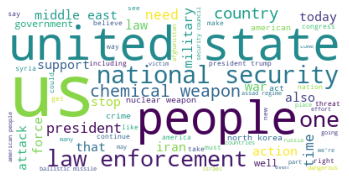

In [39]:
wordclouds(republican_df[republican_df['Cluster_num']== 15])

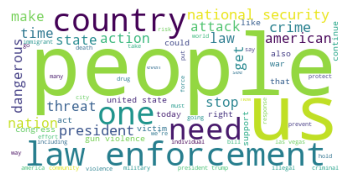

In [40]:
wordclouds(democrat_df[democrat_df['Cluster_num']== 15])

Sentiment regarding Russia

In [35]:
democrat_sentiment_Russia =democrat_df[democrat_df['Cluster_num']== 17]['compound']
republican_sentiment_Russia =republican_df[republican_df['Cluster_num']== 17]['compound']

In [36]:
print('Mean of the sentiment of democrats regarding Russia',democrat_sentiment_Russia.mean())
print('Mean of the sentiment of republicans regarding Russia',republican_sentiment_Russia.mean())

print('Variance of the sentiment of democrats regarding Russia',democrat_sentiment_Russia.var())
print('Variance of the sentiment of republicans regarding War',republican_sentiment_Russia.var())

ttest = ttest_ind(democrat_sentiment_Russia,republican_sentiment_Russia)
print(ttest)
print('The difference in the sentiment regarding Waris significant: ', ttest.pvalue<0.01)

Mean of the sentiment of democrats regarding Russia 0.02485763515426004
Mean of the sentiment of republicans regarding Russia 0.02343923394694898
Variance of the sentiment of democrats regarding Russia 0.17199365035498082
Variance of the sentiment of republicans regarding War 0.1854174275054179
Ttest_indResult(statistic=0.322422507090714, pvalue=0.7471342510663832)
The difference in the sentiment regarding Waris significant:  False


Republican vs Democrat topics

In [ ]:
df = punctuation(democrat_df)
data_words = get_data_words(df)
corpus = [dictionary.doc2bow(doc) for doc in data_words]
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency'

In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
pyLDAvis.display(gensimvis.prepare(lda_model, corpus, dictionary))

ModuleNotFoundError: ignored

In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/democrat_lda_vis_2017.html")

In [ ]:
df = punctuation(republican_df)
data_words = get_data_words(df)
corpus = [dictionary.doc2bow(doc) for doc in data_words]
data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency'

In [ ]:
pyLDAvis.save_html(data, "/content/drive/MyDrive/ADA_Proj/republican_lda_vis_2017.html")